In [180]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt
import joblib

In [181]:
df = pd.read_csv('preprocessed_data.csv')
df

,bedrooms,bathrooms,house_size,land_size,price,is_10_plus_bedrooms,is_10_plus_bathrooms,suburb_Angoda,suburb_Athurugiriya,suburb_Battaramulla,...,suburb_Moratuwa,suburb_Mount Lavinia,suburb_Nawala,suburb_Nugegoda,suburb_Pannipitiya,suburb_Piliyandala,suburb_Rajagiriya,suburb_Ratmalana,suburb_Talawatugoda,suburb_Wellampitiya
0,5.0,4.0,2800.0,8.0,320000.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,2.0,2.0,1000.0,10.0,80000.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,5.0,5.0,7000.0,15.0,700000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5.0,4.0,3600.0,22.0,120000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5.0,3.0,3000.0,17.0,350000.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3563,4.0,4.0,2500.0,8.0,300000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3564,4.0,4.0,4900.0,10.0,300000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3565,5.0,4.0,4000.0,8.0,300000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3566,3.0,2.0,1400.0,12.0,100000.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


<Axes: >

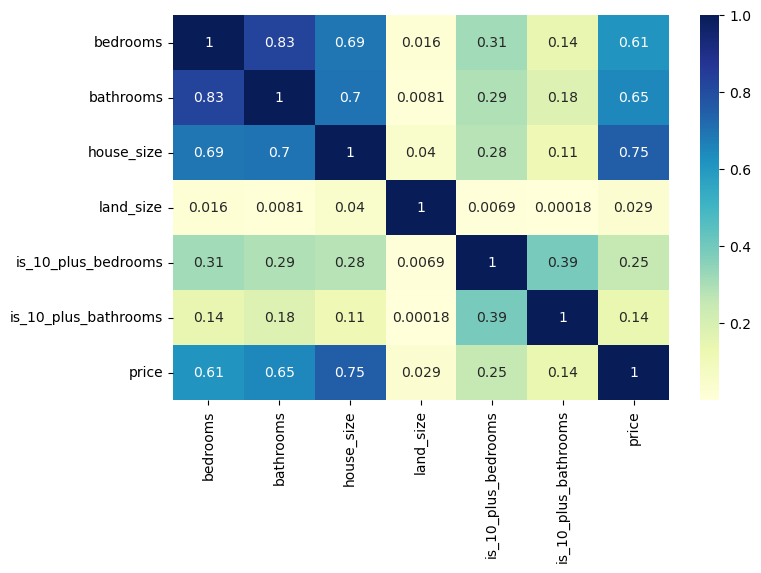

In [182]:
# Variable correlation heatmap

plt.figure(figsize = (8,5))
sns.heatmap(df[['bedrooms','bathrooms','house_size','land_size','is_10_plus_bedrooms','is_10_plus_bathrooms', 'price']].corr(), annot = True, cmap = 'YlGnBu')


In [183]:
x, y = df.drop('price', axis = 1), df['price']
x.shape, y.shape

((3568, 38), (3568,))

In [184]:
# train test split , 20% for testing

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 44)

In [185]:
x_train.shape, x_test.shape

((2854, 38), (714, 38))

### Finding Optimal Model

#### Linear

In [186]:
# Fitting LINEAR REGRESSION model

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [187]:
# training score
lr.score(x_train, y_train)

0.6798254096024645

In [188]:
# testing score
lr.score(x_test, y_test)

0.6986943618463872

In [189]:
# fitting with cross validation

lr_scores = cross_val_score(LinearRegression(), x, y, cv = 5)
print(lr_scores)
print('Average :', np.mean(lr_scores))
print('SD :', np.std(lr_scores))

[0.68677877 0.71445338 0.67285778 0.64621076 0.59872941]
Average : 0.6638060195742386
SD : 0.039292225426407285


#### Random Forest

In [190]:
# Fitting RANDOM FOREST

forest = RandomForestRegressor()
forest.fit(x_train, y_train)

RandomForestRegressor()

In [191]:
# training score
forest.score(x_train, y_train)

0.9659621265259222

In [192]:
# testing score
forest.score(x_test, y_test)

0.7803536984328936

In [193]:
scores = cross_val_score(RandomForestRegressor(), x, y, cv = 5)
print(f'Scores: {scores}')
print(f'Average: {np.mean(scores)}\nSD: {np.std(scores)}')

Scores: [0.81635103 0.82239038 0.7519917  0.72706223 0.67818044]
Average: 0.7591951557679361
SD: 0.05460444976153647


In [194]:
# Hyper parameter tuning with GridSearchCV

forest2 = RandomForestRegressor()

param_grid = {
    'n_estimators' : [20, 50, 100, 150, 200, 300],
    'max_depth' : [None, 10, 20, 50, 100, 200, 500],
    'min_samples_split' : [2, 5, 10],
    'max_features' : [0.01, 0.025, 0.05, 0.33, 1.0]
}

grid_search = GridSearchCV(forest2, param_grid, cv = 5, n_jobs=-1, return_train_score = True)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 50, 100, 200, 500],
                         'max_features': [0.01, 0.025, 0.05, 0.33, 1.0],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 50, 100, 150, 200, 300]},
             return_train_score=True)

In [195]:
df_grid = pd.DataFrame(grid_search.cv_results_)
df_grid.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
489,0.842428,0.016648,0.039872,0.007162,200,0.050,2,150,"{'max_depth': 200, 'max_features': 0.05, 'min_...",0.839543,...,0.789352,0.031731,1,0.966547,0.966599,0.968399,0.971053,0.969425,0.968405,0.001719
272,0.535311,0.014405,0.022860,0.000827,50,0.010,2,100,"{'max_depth': 50, 'max_features': 0.01, 'min_s...",0.835570,...,0.787815,0.028265,2,0.965467,0.967419,0.967163,0.969961,0.970274,0.968057,0.001814
292,1.117749,0.025228,0.048689,0.008805,50,0.025,2,200,"{'max_depth': 50, 'max_features': 0.025, 'min_...",0.839842,...,0.787650,0.032442,3,0.964526,0.968436,0.969236,0.969652,0.969636,0.968297,0.001937
2,0.521083,0.042595,0.021533,0.000901,None,0.010,2,100,"{'max_depth': None, 'max_features': 0.01, 'min...",0.842258,...,0.787639,0.032150,4,0.966132,0.968405,0.968514,0.969964,0.970255,0.968654,0.001464
21,0.769878,0.019553,0.032766,0.004481,None,0.025,2,150,"{'max_depth': None, 'max_features': 0.025, 'mi...",0.844987,...,0.787360,0.036180,5,0.967061,0.966360,0.967655,0.968698,0.969534,0.967862,0.001134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,0.234691,0.006960,0.015526,0.003759,10,0.025,10,100,"{'max_depth': 10, 'max_features': 0.025, 'min_...",0.581212,...,0.552003,0.044456,626,0.605446,0.583033,0.614722,0.583825,0.593039,0.596013,0.012368
121,0.122122,0.007165,0.009115,0.001250,10,0.025,10,50,"{'max_depth': 10, 'max_features': 0.025, 'min_...",0.552015,...,0.550759,0.052093,627,0.573199,0.592590,0.656286,0.571294,0.566080,0.591890,0.033427
120,0.050799,0.000513,0.005409,0.000374,10,0.025,10,20,"{'max_depth': 10, 'max_features': 0.025, 'min_...",0.551731,...,0.547567,0.033339,628,0.575471,0.583930,0.563205,0.619191,0.583952,0.585150,0.018639
138,0.053139,0.002589,0.005032,0.000456,10,0.050,10,20,"{'max_depth': 10, 'max_features': 0.05, 'min_s...",0.570298,...,0.543188,0.039881,629,0.590041,0.544524,0.616762,0.561614,0.603927,0.583374,0.026700


In [196]:
model_rf = grid_search.best_estimator_

In [197]:
model_rf.score(x_test, y_test)

0.8223544739536204

In [198]:
y_pred_rf = model_rf.predict(x_test)

Text(0.5, 1.0, 'y_pred vs y_test (Random Forest)')

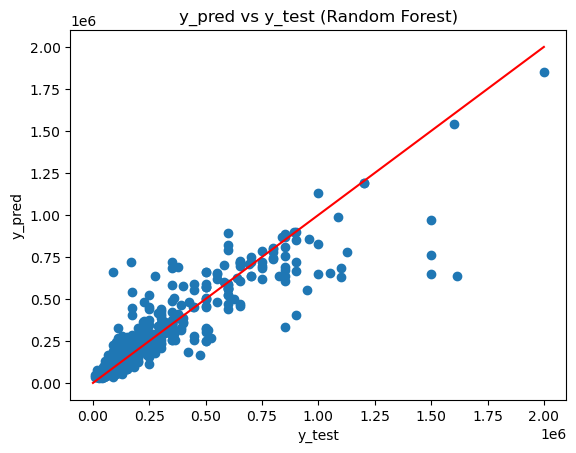

In [199]:
plt.figure()
plt.plot(np.linspace(0, max(y_test)), np.linspace(0, max(y_test)), color = 'red')
plt.scatter(y_test, y_pred_rf)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('y_pred vs y_test (Random Forest)')

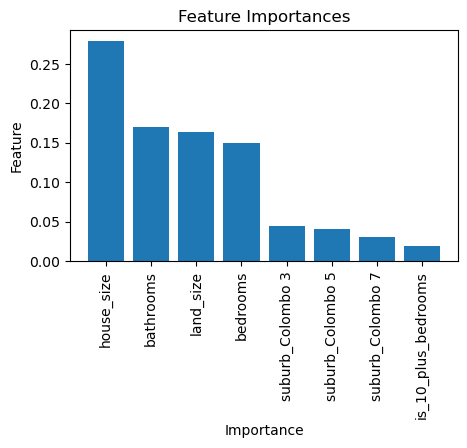

In [200]:
importances = model_rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(5, 3))
plt.bar(feature_importance_df['feature'].iloc[0:8], feature_importance_df['importance'].iloc[0:8])
plt.xlabel('Importance')
plt.xticks(rotation=90)
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

#### XGBoost

In [201]:
model_XGB = XGBRegressor(
    n_estimators=3000,
    learning_rate=0.01,
    max_depth=40,
    subsample=0.55,
    colsample_bytree=0.8,
    early_stopping_rounds=50,
    random_state=42
)

model_XGB.fit(x_train, y_train, 
          eval_set=[(x_test, y_test)], 
          verbose=True)


[0]	validation_0-rmse:252567.41885
[1]	validation_0-rmse:250612.82606
[2]	validation_0-rmse:248752.51423
[3]	validation_0-rmse:246936.45095
[4]	validation_0-rmse:245239.86364
[5]	validation_0-rmse:243799.54966
[6]	validation_0-rmse:242048.30558
[7]	validation_0-rmse:240373.24039
[8]	validation_0-rmse:238895.67480
[9]	validation_0-rmse:237446.57766
[10]	validation_0-rmse:235617.03348
[11]	validation_0-rmse:233981.91592
[12]	validation_0-rmse:232361.76223
[13]	validation_0-rmse:230797.56277
[14]	validation_0-rmse:229258.18268
[15]	validation_0-rmse:227712.89826
[16]	validation_0-rmse:226230.35704
[17]	validation_0-rmse:224653.56679
[18]	validation_0-rmse:223282.67862
[19]	validation_0-rmse:221764.03599
[20]	validation_0-rmse:220405.36212
[21]	validation_0-rmse:218966.82971
[22]	validation_0-rmse:217539.48122
[23]	validation_0-rmse:216170.49516
[24]	validation_0-rmse:214750.65608
[25]	validation_0-rmse:213495.34172
[26]	validation_0-rmse:212312.18185
[27]	validation_0-rmse:210919.72882
[2

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=40, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=3000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [202]:
y_pred_XGB = model_XGB.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_XGB))
r2 = r2_score(y_test, y_pred_XGB)

print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R^2 Score: {r2:.4f}')

Root Mean Squared Error (RMSE): 121537.2726
R^2 Score: 0.7714


Text(0.5, 1.0, 'y_pred vs y_test (XGBoost)')

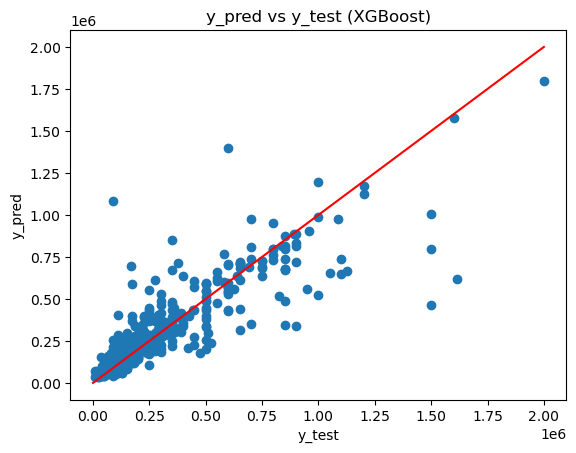

In [203]:
plt.figure()
plt.plot(np.linspace(0, max(y_test)), np.linspace(0, max(y_test)), color = 'red')
plt.scatter(y_test, y_pred_XGB)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('y_pred vs y_test (XGBoost)')

In [204]:
# Random Forest has a better score

model = model_rf

In [205]:
# Saving model

joblib.dump(model, "model.pkl")

['model.pkl']